# A rotating mesh with spots

In [1]:
from spice.models import IcosphereModel
from spice.models.mesh_transform import add_rotation, evaluate_rotation
from spice.models.spots import add_spots
from spice.plots import plot_3D, plot_3D_mesh_and_spectrum
from spice.spectrum import simulate_spectrum
import astropy.units as u
import jax.numpy as jnp
import numpy as np
from transformer_payne import BlackbodyFlux

from jax import config
config.update('jax_platform_name', 'cpu')
config.update("jax_enable_x64", True)

Let's use the simplest example for the sake of speed - the blackbody flux from the ```transformer_payne``` package.

In [2]:
bb = BlackbodyFlux()

The API is in the functional paradigm - you pass a "model" mesh, and the function returns a modified version of the mesh. However, the original passed mesh still remains if you choose not to overwrite these variables.

In [3]:
base_temp = 5700
spot_temp = 20000
spot_diff = spot_temp - base_temp

m = IcosphereModel.construct(1000, u.solRad.to(u.cm), 1., 1., bb.to_parameters(dict(teff=base_temp)))

ms = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([spot_diff]),
              radii=jnp.array([0.25]),
              radius_factors=jnp.array([.75]),
              param_indices=jnp.array([0]))

/Users/majajablonska/miniconda/envs/tp-env/lib/python3.12/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float64 to dtype=int64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


In [4]:
TIMESTAMPS = np.linspace(0, 3600*10, 50)

mt = add_rotation(ms, 100, jnp.array([0., 0., 1.]))
mts = [evaluate_rotation(mt, t) for t in TIMESTAMPS]

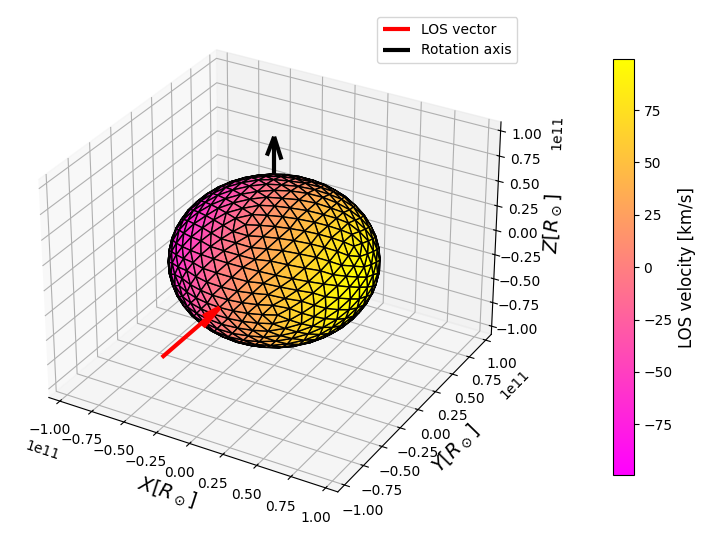

In [5]:
_, _ = plot_3D(mts[0], 'los_velocities', cmap='spring')

In [6]:
_, _ = plot_3D(mts[0], 0, cmap='spring', property_label='effective temperature [K]')

## Spectrum emulation

In [ ]:
vws = jnp.linspace(1000., 8000., 1000)
specs = [simulate_spectrum(bb.intensity, mt0, jnp.log10(vws)) for mt0 in mts]

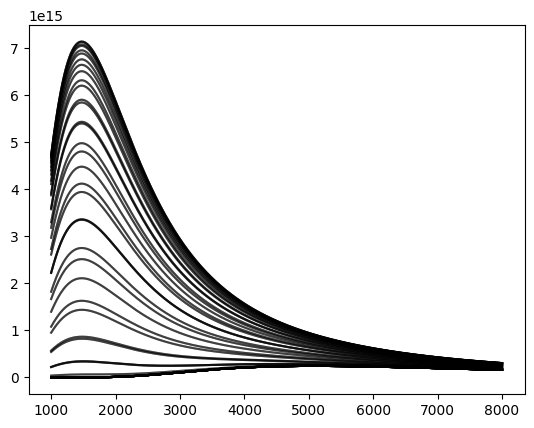

In [ ]:
import matplotlib.pyplot as plt

for spec in specs:
    plt.plot(vws, spec, color='black', alpha=0.5)

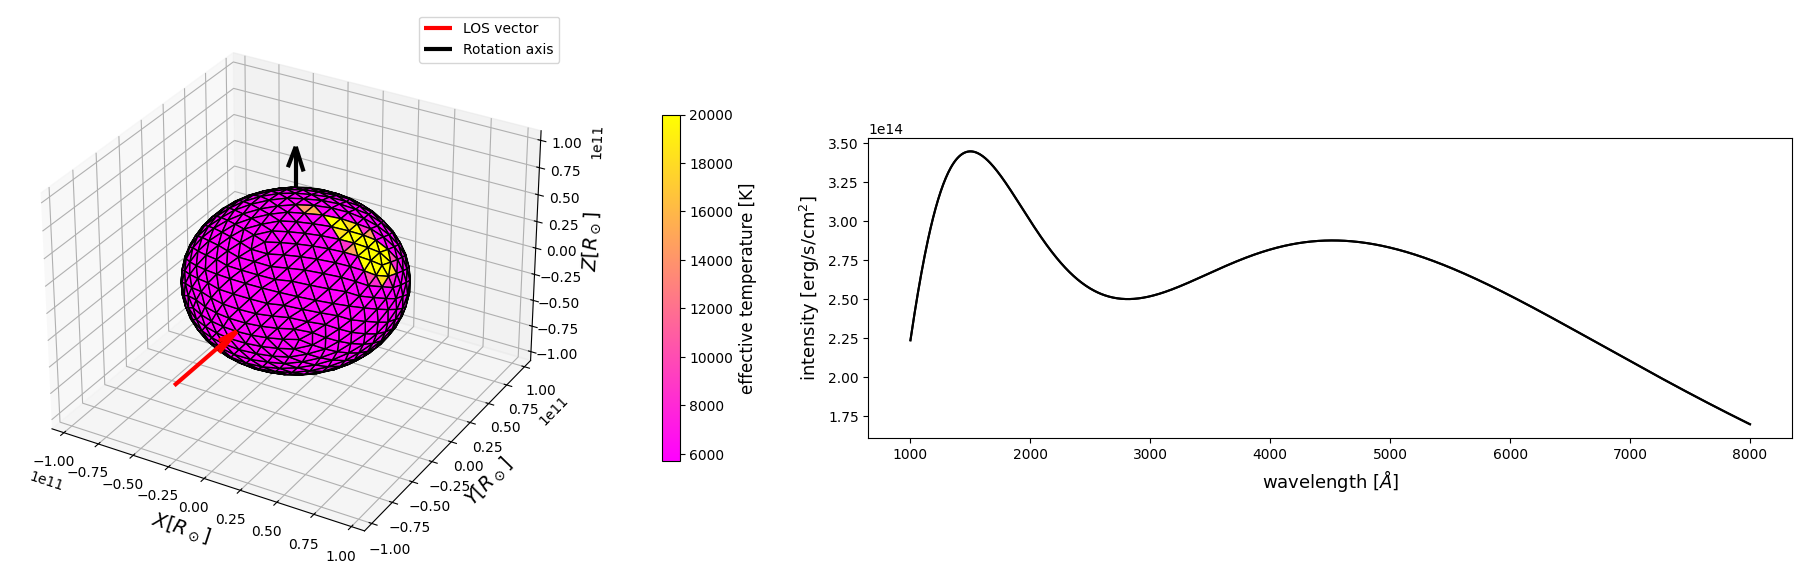

In [ ]:
plot_3D_mesh_and_spectrum(mts[0], vws, specs[0], dict(property=0, cmap='spring', property_label='effective temperature [K]'))

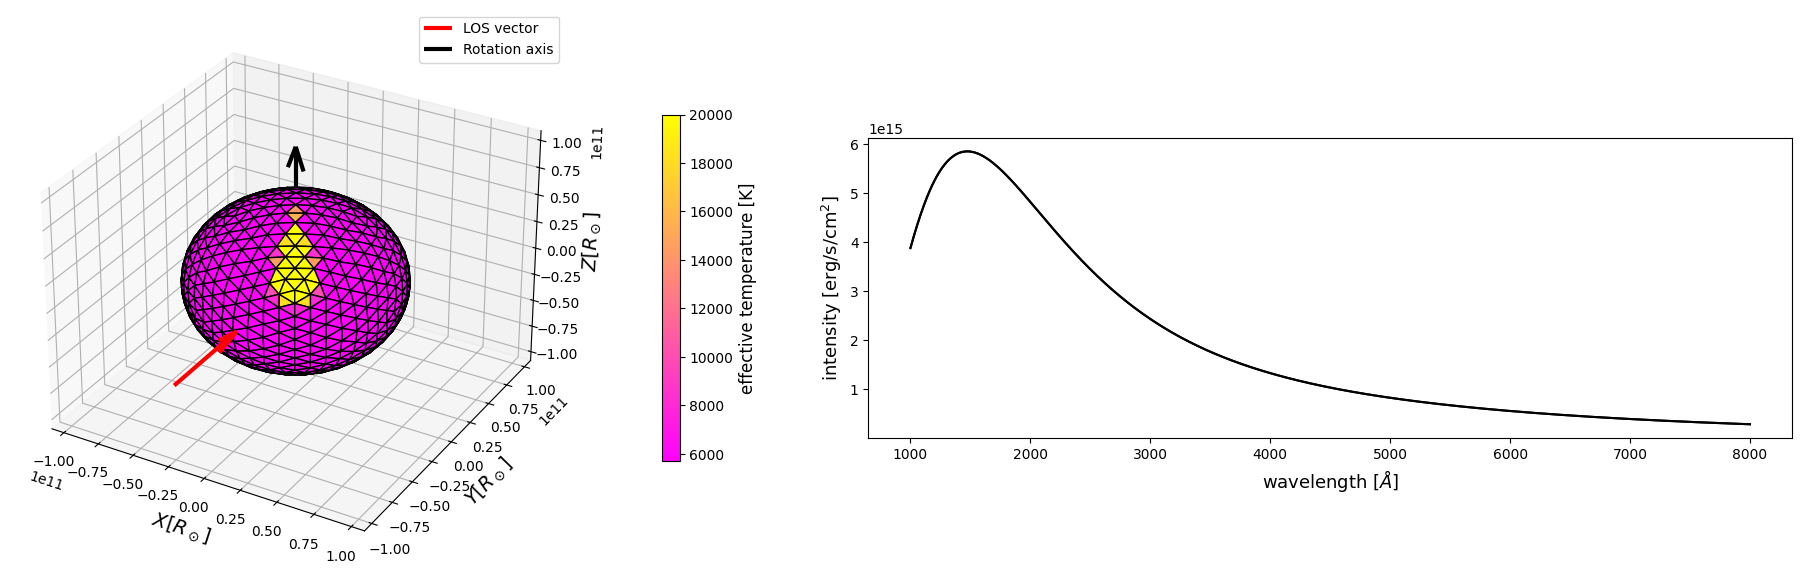

In [ ]:
plot_3D_mesh_and_spectrum(mts[10], vws, specs[10], dict(property=0, cmap='spring', property_label='effective temperature [K]'))